In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import imshow
from tqdm import tqdm
import torch
from torch.nn import Module
from collections import namedtuple, defaultdict
from pathlib import Path
from omegaconf import OmegaConf, DictConfig
import time

%matplotlib inline
rcParams['figure.figsize'] = (10, 15)

import sys
sys.path.append('../../')

/opt/conda/envs/torchok/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchok.constructor.config_structure import ConfigParams
from torchok.constructor import TASKS
from torchok.constructor.constructor import Constructor
from torchok.constructor.config_structure import Phase


device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Path to yaml
config_path = '../configs/representation_arcface_sop.yaml'
# Load yaml
config = OmegaConf.load(config_path)
OmegaConf.resolve(config)
schema = OmegaConf.structured(ConfigParams)
config = OmegaConf.merge(schema, config)

constructor = Constructor(config)
constructor

In [3]:
dataset = Constructor._create_dataset(config.data[Phase.TRAIN][0].dataset)
dataset

Files already downloaded and verified


In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
def decode_img(tensor):
    tensor = tensor.permute(1, 2, 0).detach().cpu().numpy()
    return (np.clip(tensor * std + mean, 0., 1.) * 255).astype(np.uint8)

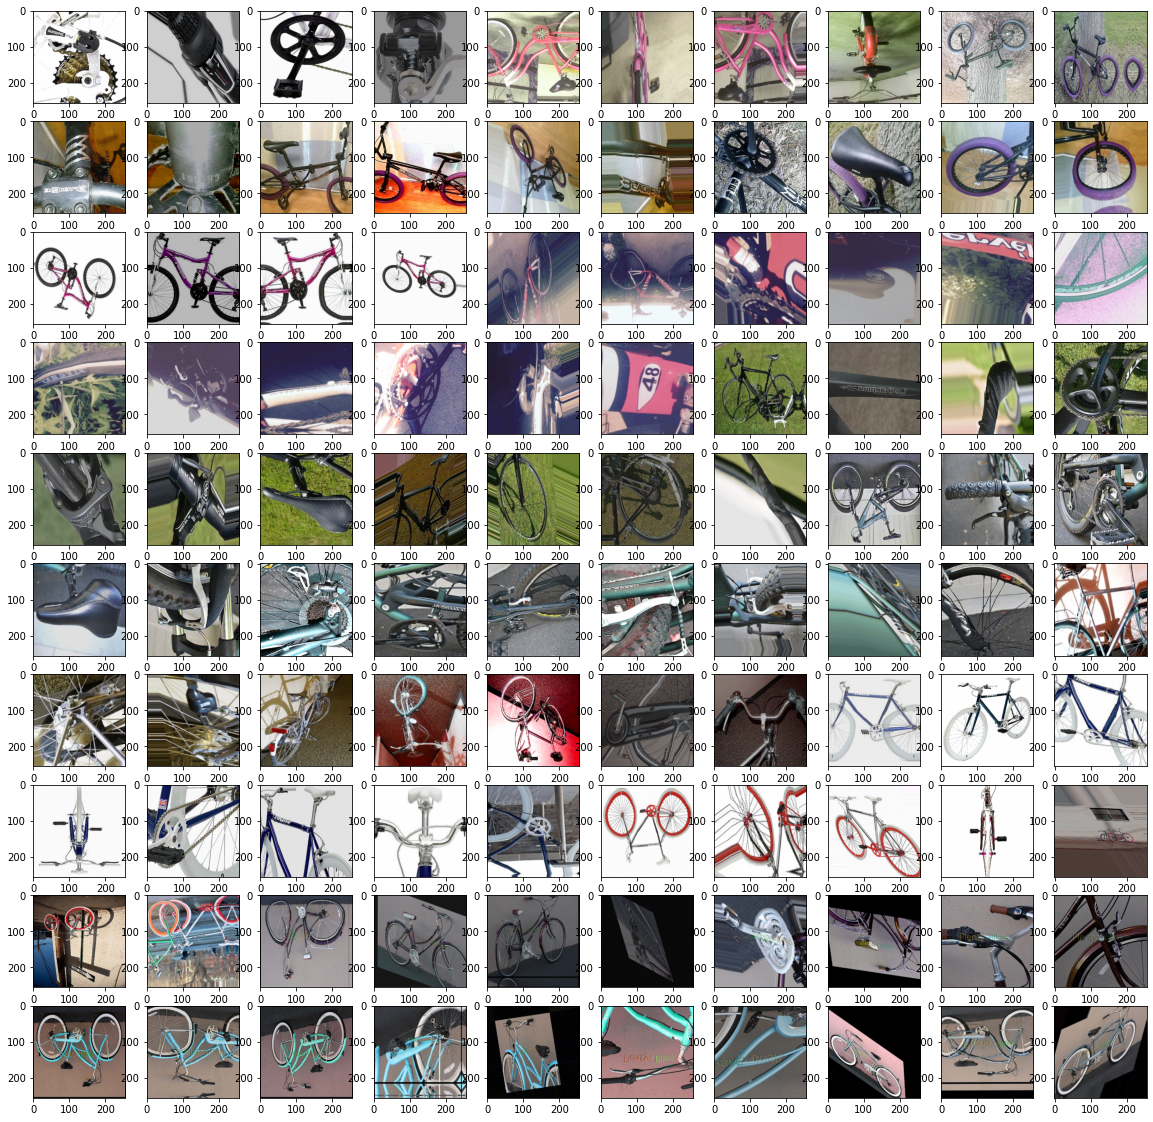

In [5]:
start_idx = 400
n_imgs = 100
n_cols = 10
fig, axs = plt.subplots(n_imgs // n_cols, n_cols, figsize=(20, 2 * n_imgs // n_cols))

targets = []
for i in range(n_imgs):
    sample = dataset[start_idx + i]
    img = decode_img(sample['image'])
    targets.append(sample['target'])
    axs[i // n_cols][i % n_cols].imshow(img)